In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data= pd.read_csv("E:\\project\\1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [9]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
data1=data.dropna(axis=0)

In [11]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


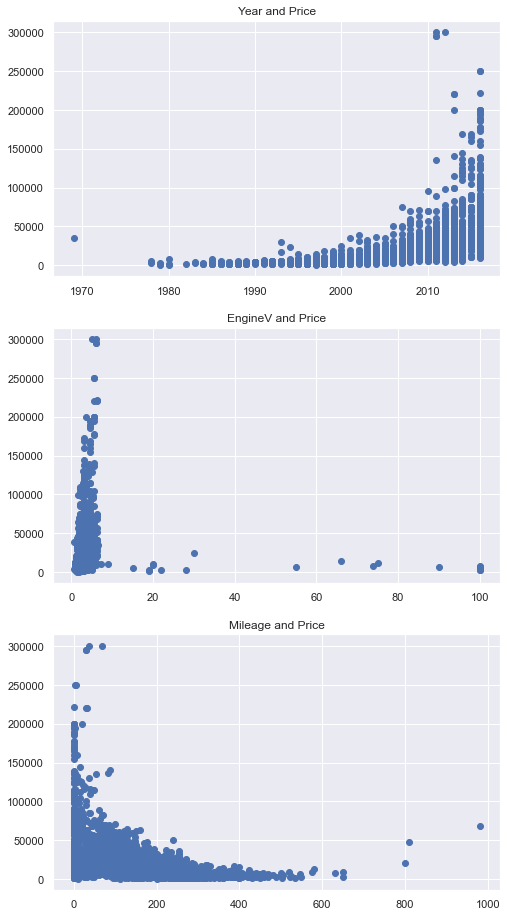

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,16))
plt.subplot(3, 1, 1)
plt.scatter(data1['Year'],data1["Price"])
plt.title("Year and Price")
plt.subplot(3, 1, 2)
plt.scatter(data1['EngineV'],data1["Price"])
plt.title("EngineV and Price")
plt.subplot(3, 1, 3)
plt.scatter(data1["Mileage"],data1["Price"])
plt.title("Mileage and Price")
plt.show()

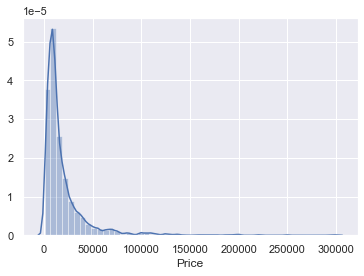

In [15]:
sns.distplot(data1["Price"])

In [17]:
log_Price = np.log(data1["Price"])
data1["Price"] = log_Price
data1

<ipython-input-17-f22e053f0e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Price"] = log_Price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,11.736069,sedan,9,3.0,Diesel,yes,2014
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8.987197,sedan,194,2.0,Petrol,yes,1985


In [18]:
data1.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'], dtype=object)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data1[['Mileage', 'Year', 'EngineV']]
vif =pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [23]:
vif

,VIF,features
0,3.481307,Mileage
1,3.748134,Year
2,1.314535,EngineV


In [26]:
data2=data1.drop(['Year'], axis=1)

#Dummy variable

In [56]:
data_with_dummies = pd.get_dummies(data2, drop_first=True)

In [57]:
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#Rearrange a bit

In [59]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [62]:
cols = ['Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [63]:
data_preprocessed = data_with_dummies[cols]

In [64]:
data_preprocessed.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [65]:
variables = data_preprocessed
variables.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [66]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,24.034746,Price
1,3.832697,Mileage
2,1.345647,EngineV
3,2.589877,Brand_BMW
4,3.197143,Brand_Mercedes-Benz
5,1.776828,Brand_Mitsubishi
6,2.224212,Brand_Renault
7,2.393533,Brand_Toyota
8,3.245289,Brand_Volkswagen
9,1.439487,Body_hatch


In [67]:
variables = data_preprocessed.drop('Price', axis=1)
variables.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [68]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,3.753222,Mileage
1,1.324850,EngineV
2,2.056511,Brand_BMW
3,2.620522,Brand_Mercedes-Benz
4,1.614771,Brand_Mitsubishi
5,2.091110,Brand_Renault
6,2.026829,Brand_Toyota
7,2.826122,Brand_Volkswagen
8,1.427679,Body_hatch
9,1.545955,Body_other


#Linear Refression Model

#DEclare the input and target

In [93]:
targets = data_preprocessed["Price"]
inputs = data_preprocessed.drop(["Price"], axis=1)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

#Scale the data

In [95]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [96]:
inputs_scaled = scaler.transform(inputs)

#Train test split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

In [101]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [102]:
y_hat = reg.predict(x_train)

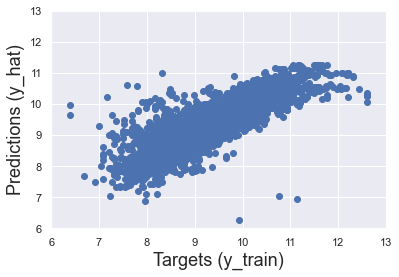

In [103]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

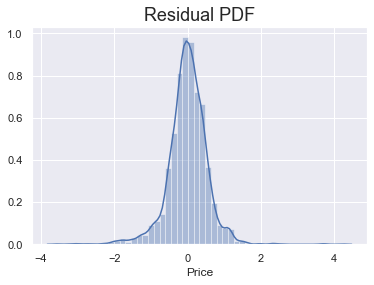

In [104]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [105]:
reg.score(x_train, y_train)

0.6686451039108157

In [106]:
reg.intercept_

9.41118935425943

In [107]:
reg.coef_

array([-0.4559064 ,  0.03772094,  0.04502707,  0.07951824, -0.15630005,
       -0.21820581, -0.0430845 , -0.11081373, -0.24560188, -0.14807804,
       -0.31139124, -0.18813338, -0.24681883, -0.11745111, -0.0354321 ,
       -0.12312405,  0.31613321])

In [108]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [109]:
reg_summary

,Features,Weights
0,Mileage,-0.455906
1,EngineV,0.037721
2,Brand_BMW,0.045027
3,Brand_Mercedes-Benz,0.079518
4,Brand_Mitsubishi,-0.156300
5,Brand_Renault,-0.218206
6,Brand_Toyota,-0.043085
7,Brand_Volkswagen,-0.110814
8,Body_hatch,-0.245602
9,Body_other,-0.148078


# Testing

In [111]:
y_hat_test = reg.predict(x_test)


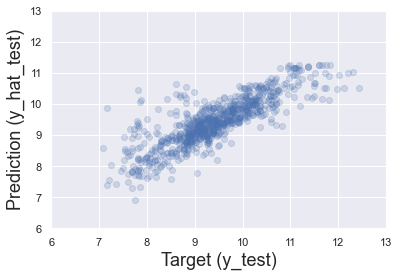

In [112]:
plt.scatter(y_test , y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [113]:
Dfpf =pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
Dfpf.head()

,Prediction
0,14103.389019
1,9212.852967
2,11807.130297
3,8540.997789
4,9154.378114


In [115]:
Dfpf["Target"]=np.exp(y_test)

In [116]:
Dfpf.head()

,Prediction,Target
0,14103.389019,NaN
1,9212.852967,NaN
2,11807.130297,NaN
3,8540.997789,NaN
4,9154.378114,NaN


In [117]:
Dfpf

,Prediction,Target
0,14103.389019,NaN
1,9212.852967,NaN
2,11807.130297,NaN
3,8540.997789,NaN
4,9154.378114,NaN
...,...,...
800,14303.310915,NaN
801,7363.296478,16950.0
802,11158.692194,NaN
803,11230.865212,57000.0


In [120]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.043249
1     9.093807
2     9.568015
3     9.024011
4     9.047821
Name: Price, dtype: float64

In [121]:
Dfpf["Target"]=np.exp(y_test)
Dfpf.head()

,Prediction,Target
0,14103.389019,23000.0
1,9212.852967,8900.0
2,11807.130297,14300.0
3,8540.997789,8300.0
4,9154.378114,8500.0


In [122]:
Dfpf["Residual"] = Dfpf["Target"] - Dfpf["Prediction"]

In [124]:
Dfpf.head()

,Prediction,Target,Residual
0,14103.389019,23000.0,8896.610981
1,9212.852967,8900.0,-312.852967
2,11807.130297,14300.0,2492.869703
3,8540.997789,8300.0,-240.997789
4,9154.378114,8500.0,-654.378114


In [126]:
Dfpf["Difference%"] = np.absolute(Dfpf["Residual"]/Dfpf["Target"]* 100)

In [127]:
Dfpf

,Prediction,Target,Residual,Difference%
0,14103.389019,23000.0,8896.610981,38.680917
1,9212.852967,8900.0,-312.852967,3.515202
2,11807.130297,14300.0,2492.869703,17.432655
3,8540.997789,8300.0,-240.997789,2.903588
4,9154.378114,8500.0,-654.378114,7.698566
...,...,...,...,...
800,14303.310915,21000.0,6696.689085,31.888996
801,7363.296478,8200.0,836.703522,10.203701
802,11158.692194,8700.0,-2458.692194,28.260830
803,11230.865212,9300.0,-1930.865212,20.761992


In [128]:
Dfpf.describe()

,Prediction,Target,Residual,Difference%
count,805.000000,805.000000,805.000000,805.000000
mean,16710.541991,19901.382534,3190.840544,46.722014
std,14195.057609,25877.122170,18155.204573,99.173192
min,983.598289,1180.000000,-36510.041048,0.040092
25%,7746.784914,6900.000000,-2441.391947,12.193454
50%,12321.366930,11550.000000,181.708911,24.938793
75%,20642.856838,22900.000000,3565.515197,43.942454
max,76291.359587,249999.000000,213897.142165,1384.054016


In [132]:
pd.options.display.max_rows = 999
pd.set_option('display.float', lambda x: "%.2f" % x)
Dfpf.sort_values(by=["Difference%"])

,Prediction,Target,Residual,Difference%
256,18207.30,18200.00,-7.30,0.04
105,4503.35,4500.00,-3.35,0.07
436,10789.72,10800.00,10.28,0.10
758,24853.83,24900.00,46.17,0.19
643,17536.98,17500.00,-36.98,0.21
432,8072.54,8100.00,27.46,0.34
10,9842.88,9800.00,-42.88,0.44
615,3519.11,3500.00,-19.11,0.55
197,70577.29,69999.00,-578.29,0.83
265,2623.16,2600.00,-23.16,0.89
